In [ ]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is connected and available.")
    print("GPUs available:", tf.config.list_physical_devices('GPU'))
else:
    print("GPU is not available.")


GPU is connected and available.
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import os

data_dir = "C:/Users/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset"
categories = os.listdir(data_dir)
category_counts = {category: len(os.listdir(os.path.join(data_dir, category))) for category in categories}
print(category_counts)


{'Anthracnose': 500, 'Bacterial Canker': 500, 'Cutting Weevil': 500, 'Die Back': 500, 'Gall Midge': 500, 'Healthy': 500, 'Powdery Mildew': 500, 'Sooty Mould': 500}


In [ ]:
from PIL import Image
import numpy as np

image_shapes = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        with Image.open(img_path) as img:
            image_shapes.append(img.size)

unique_shapes = np.unique(image_shapes, axis=0)
print("Unique image dimensions:", unique_shapes)


ERROR! Session/line number was not unique in database. History logging moved to new session 7
Unique image dimensions: [[187 320]
 [189 320]
 [210 320]
 [213 320]
 [214 320]
 [217 320]
 [218 320]
 [219 320]
 [224 320]
 [226 320]
 [229 320]
 [234 320]
 [237 320]
 [238 320]
 [240 240]
 [240 245]
 [240 246]
 [240 262]
 [240 263]
 [240 265]
 [240 271]
 [240 272]
 [240 273]
 [240 282]
 [240 283]
 [240 285]
 [240 290]
 [240 297]
 [240 299]
 [240 306]
 [240 308]
 [240 317]
 [240 320]
 [244 240]
 [249 240]
 [262 240]
 [266 240]
 [282 240]
 [284 240]
 [288 240]
 [292 240]
 [297 240]
 [300 240]
 [302 240]
 [304 240]
 [305 240]
 [307 240]
 [309 240]
 [313 240]
 [314 240]
 [320  70]
 [320  86]
 [320  92]
 [320 160]
 [320 162]
 [320 166]
 [320 171]
 [320 173]
 [320 175]
 [320 179]
 [320 182]
 [320 193]
 [320 195]
 [320 197]
 [320 199]
 [320 200]
 [320 205]
 [320 206]
 [320 207]
 [320 209]
 [320 210]
 [320 211]
 [320 212]
 [320 213]
 [320 214]
 [320 217]
 [320 218]
 [320 219]
 [320 220]
 [320 221]
 

ERROR! Session/line number was not unique in database. History logging moved to new session 8


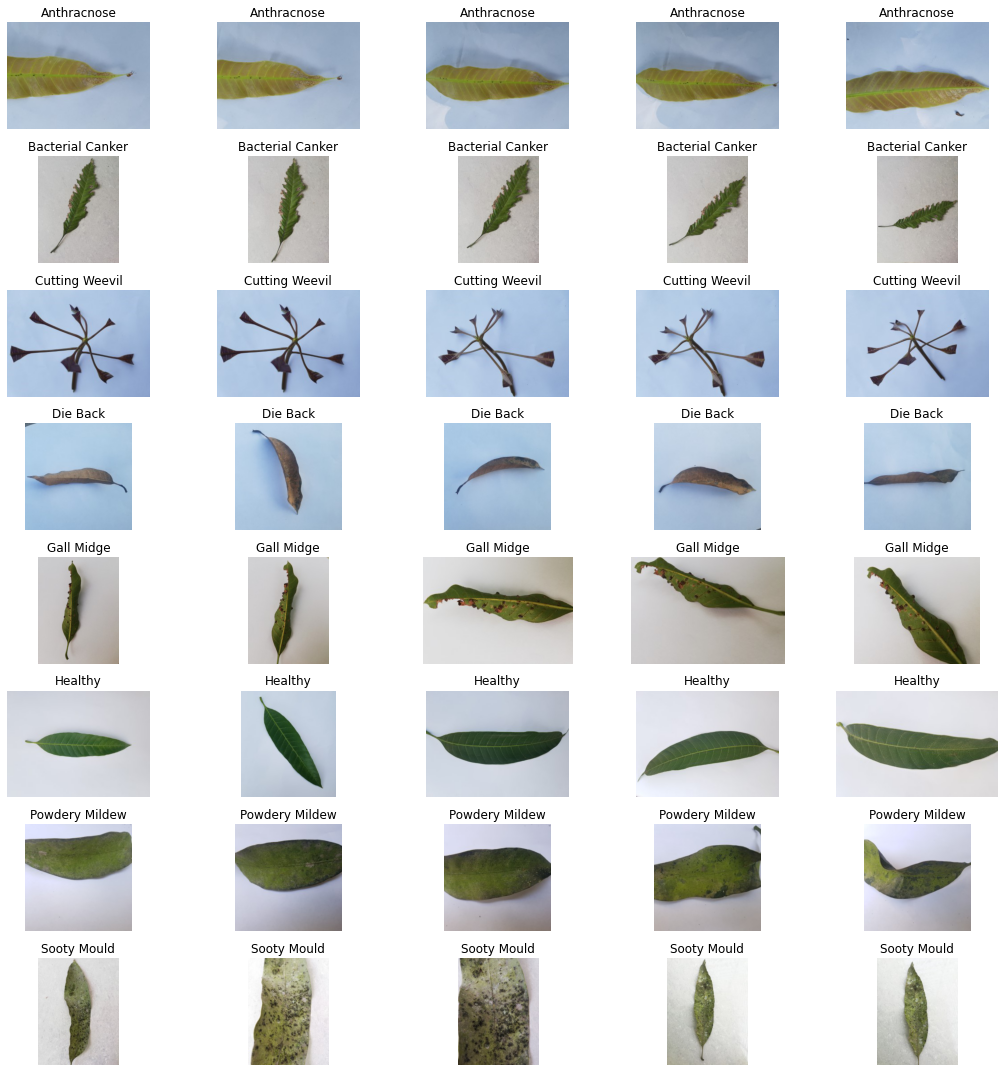

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(categories), 5, figsize=(15, 15))
for i, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    for j, img_name in enumerate(os.listdir(category_path)[:5]):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(category)
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()


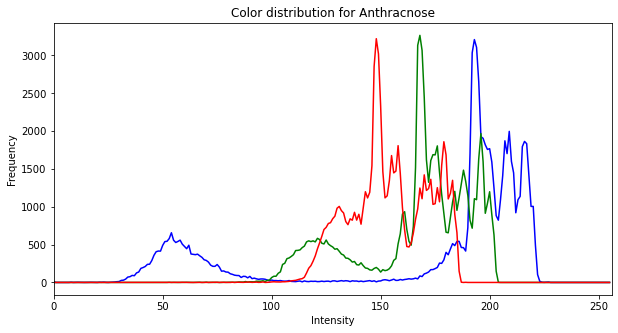

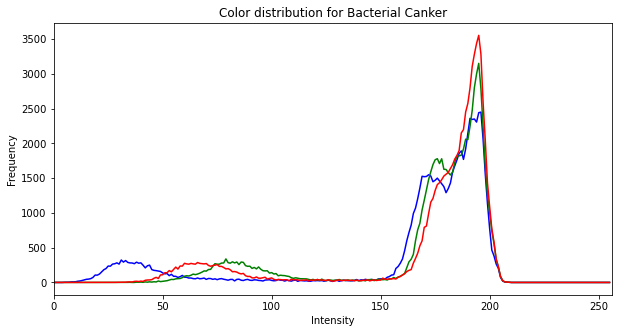

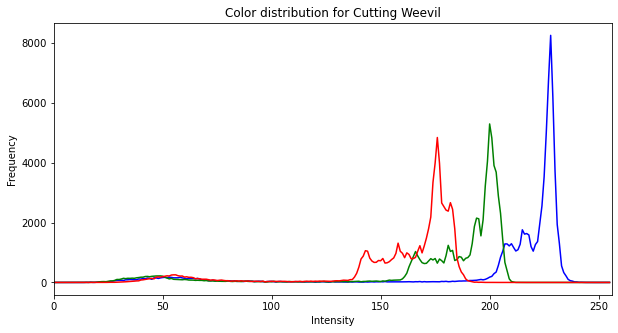

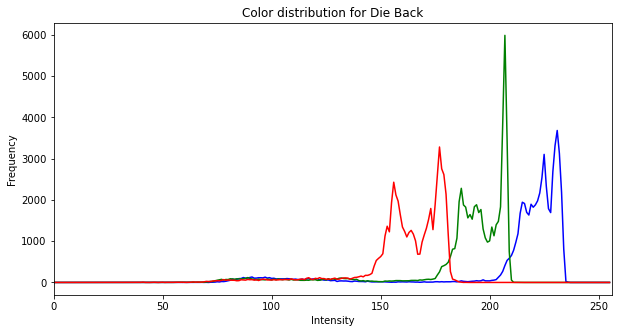

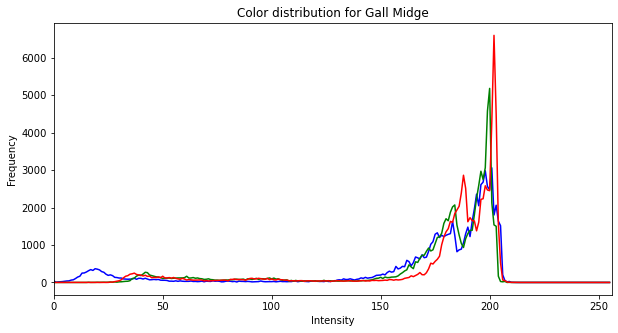

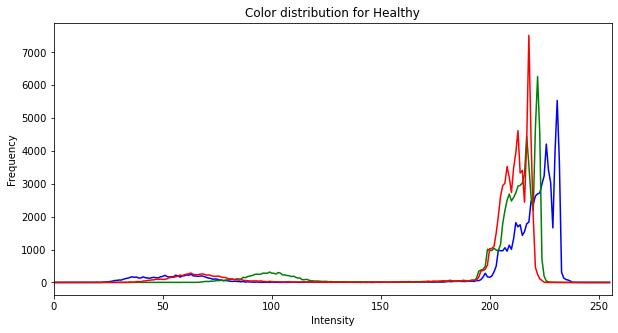

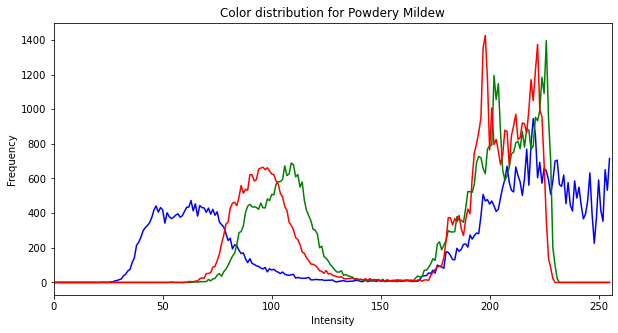

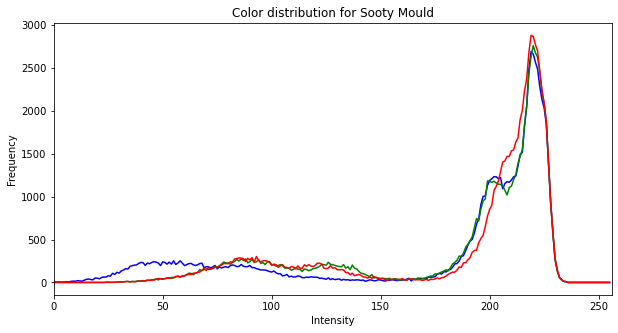

In [ ]:
import cv2
import matplotlib.pyplot as plt

def calculate_color_histogram(image_path):
    img = cv2.imread(image_path)
    colors = ('b', 'g', 'r')
    hist = {}
    for i, col in enumerate(colors):
        hist[col] = cv2.calcHist([img], [i], None, [256], [0, 256])
    return hist

for category in categories:
    category_path = os.path.join(data_dir, category)
    img_path = os.path.join(category_path, os.listdir(category_path)[0])
    hist = calculate_color_histogram(img_path)
    plt.figure(figsize=(10, 5))
    for col, color_hist in hist.items():
        plt.plot(color_hist, color=col)
        plt.xlim([0, 256])
    plt.title(f"Color distribution for {category}")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.show()


ERROR! Session/line number was not unique in database. History logging moved to new session 10


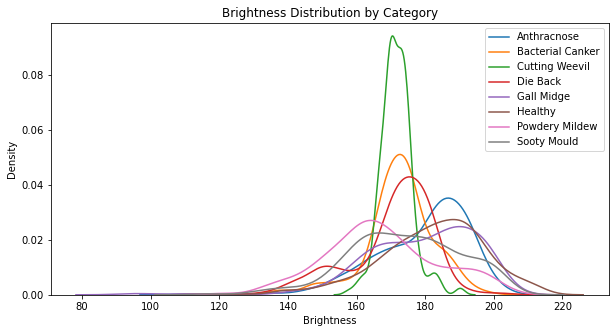

In [ ]:
import cv2
import numpy as np
import os
import seaborn as sns  # Add this line
import matplotlib.pyplot as plt

def calculate_brightness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.mean(img)

brightness_values = {}
for category in categories:
    category_path = os.path.join(data_dir, category)
    brightness_values[category] = [calculate_brightness(os.path.join(category_path, img_name)) for img_name in os.listdir(category_path)]

# Plot the brightness distribution
plt.figure(figsize=(10, 5))
for category, values in brightness_values.items():
    sns.kdeplot(values, label=category)
plt.title("Brightness Distribution by Category")
plt.xlabel("Brightness")
plt.legend()
plt.show()


In [ ]:
import os
import cv2
import numpy as np

# Set the corrected path to the dataset

data_path = "C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset"

categories = os.listdir(data_path)

# Parameters
IMG_SIZE = 128  # Resize images to 128x128 pixels

# Initialize lists to store images and labels
data = []
labels = []

# Load images and labels
for category in categories:
    category_path = os.path.join(data_path, category)
    if not os.path.isdir(category_path):
        print(f"Skipping non-folder: {category_path}")
        continue
    print(f"Processing category: {category}")
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        print(f"Reading image: {img_path}")
        img = cv2.imread(img_path)
        if img is not None:
            # Resize the image to a fixed size (128x128)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            # Flatten the image for Random Forest (convert it to a 1D array)
            img = img.flatten()
            data.append(img)
            labels.append(category)
        else:
            print(f"Failed to load image: {img_path}")

# Convert lists to numpy arrays if there are images loaded
if data:
    data = np.array(data)
    labels = np.array(labels)
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
else:
    print("No images were loaded. Please check the dataset path and folder structure.")


Processing category: Anthracnose
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124249 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124250 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124252 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124253 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124256 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desktop/CSE 475/Dataset/MangoLeaf/MangoLeafBD Dataset/MangoLeafBD Dataset\Anthracnose\20211008_124301 (Custom).jpg
Reading image: C:/Users/arifu/OneDrive/Desk

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (3200, 49152)
Testing data shape: (800, 49152)
Training labels shape: (3200,)
Testing labels shape: (800,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.86

Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.92      0.78      0.85       123
Bacterial Canker       0.82      0.86      0.84        86
  Cutting Weevil       0.94      1.00      0.97       112
        Die Back       0.92      0.92      0.92       101
      Gall Midge       0.77      0.84      0.80       104
         Healthy       0.86      0.90      0.88        90
  Powdery Mildew       0.92      0.79      0.85        91
     Sooty Mould       0.72      0.78      0.75        93

        accuracy                           0.86       800
       macro avg       0.86      0.86      0.86       800
    weighted avg       0.86      0.86      0.86       800



In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Decision Tree Model Accuracy: 0.68625

Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.80      0.60      0.69       123
Bacterial Canker       0.63      0.72      0.67        86
  Cutting Weevil       0.89      0.97      0.93       112
        Die Back       0.84      0.84      0.84       101
      Gall Midge       0.54      0.57      0.55       104
         Healthy       0.61      0.67      0.63        90
  Powdery Mildew       0.63      0.58      0.61        91
     Sooty Mould       0.51      0.51      0.51        93

        accuracy                           0.69       800
       macro avg       0.68      0.68      0.68       800
    weighted avg       0.69      0.69      0.69       800



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearch
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to predict
best_rf_model = grid_search.best_estimator_
best_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Best Model Accuracy:", best_accuracy)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Accuracy: 0.85875
